In [1]:
#Deklarasi library
import pandas as pd
import string 
import re
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [2]:
#Memanggil frame data
pd. options.display.float_format ='{:.2f}'.format

df = pd.read_csv("C:/Users/adity/Documents/Kuliah/Semester 5/Kecerdasan Buatan/Materi UAS/indonesian_tweet_about_teroris.csv")
df = df[0:250]
df

,tweet id,name,username,tweet text,reference type,reference id,created at,like,quote,reply,retweet,tweet url,mentions,hashtags
0,1467687742356131847,sigarantang,endinburhanudin,@alisyarief Yang disebut teroris ia komplotan ...,replied_to,1467646022545334272.00,2021-12-06T02:50:00.000Z,0,0,0,0,https://twitter.com/endinburhanudin/status/146...,@alisyarief,NaN
1,1467687491243184130,TEDJA WOELOENG,TedjaWoeloeng,"Pak @prabowo, hanya pada bapaklah saya berhara...",original,NaN,2021-12-06T02:49:00.000Z,1,0,0,0,https://twitter.com/TedjaWoeloeng/status/14676...,@prabowo,NaN
2,1467687322586005508,Alap² Lautan Teduh,Alap2T,@s_soediro Kok darahnya ga mendidih yaa ?\r\nM...,replied_to,1467656408854241280.00,2021-12-06T02:48:20.000Z,0,0,0,0,https://twitter.com/Alap2T/status/146768732258...,@s_soediro,NaN
3,1467687235919101954,juragan ikan,kaki_fluffy,@THEKAMPRET10 lah 🤣 gak merasa sweeping salah?...,replied_to,1467665552801890304.00,2021-12-06T02:48:00.000Z,0,0,0,0,https://twitter.com/kaki_fluffy/status/1467687...,@THEKAMPRET10,NaN
4,1467686839121186819,juragan ikan,kaki_fluffy,@wir0_ketandan @THEKAMPRET10 @elfariidd @y03_n...,replied_to,1467671797810089984.00,2021-12-06T02:46:25.000Z,0,0,0,0,https://twitter.com/kaki_fluffy/status/1467686...,"@wir0_ketandan,@THEKAMPRET10,@elfariidd,@y03_n4n4",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1467645338601148420,𝗥𝗮𝘀𝘆,ratiovary,Teroris kelompok kriminal bersenjata (KKB) Yah...,original,NaN,2021-12-06T00:01:30.000Z,0,0,0,0,https://twitter.com/ratiovary/status/146764533...,NaN,PapuaIndonesia
246,1467645337934258177,lina,imtaehwan92,"Stop provokasi dan berita bohong, terus dukung...",original,NaN,2021-12-06T00:01:30.000Z,0,0,0,0,https://twitter.com/imtaehwan92/status/1467645...,NaN,NaN
247,1467645336084643841,3 fairus,29fairus,"Bangunan SMA Negeri 1 Oksibil, Distrik Seramba...",original,NaN,2021-12-06T00:01:30.000Z,0,0,0,0,https://twitter.com/29fairus/status/1467645336...,NaN,NaN
248,1467645327943495682,8,6O596,"Teroris KKB berbohong mau melindungi, buktinya...",original,NaN,2021-12-06T00:01:28.000Z,0,0,0,0,https://twitter.com/6O596/status/1467645327943...,NaN,PapuaIndonesia


In [3]:
#Mengubah nama kolom yang terdapat whitespace.
df = df.rename({'tweet id': 'tweet_id', 'reference type': 'reference_type','tweet text' : 'tweet_text','tweet url':'tweet_url', 'reference id' : 'reference_id'}, axis = 1)
df.head()

,tweet_id,name,username,tweet_text,reference_type,reference_id,created at,like,quote,reply,retweet,tweet_url,mentions,hashtags
0,1467687742356131847,sigarantang,endinburhanudin,@alisyarief Yang disebut teroris ia komplotan ...,replied_to,1467646022545334272.00,2021-12-06T02:50:00.000Z,0,0,0,0,https://twitter.com/endinburhanudin/status/146...,@alisyarief,NaN
1,1467687491243184130,TEDJA WOELOENG,TedjaWoeloeng,"Pak @prabowo, hanya pada bapaklah saya berhara...",original,NaN,2021-12-06T02:49:00.000Z,1,0,0,0,https://twitter.com/TedjaWoeloeng/status/14676...,@prabowo,NaN
2,1467687322586005508,Alap² Lautan Teduh,Alap2T,@s_soediro Kok darahnya ga mendidih yaa ?\r\nM...,replied_to,1467656408854241280.00,2021-12-06T02:48:20.000Z,0,0,0,0,https://twitter.com/Alap2T/status/146768732258...,@s_soediro,NaN
3,1467687235919101954,juragan ikan,kaki_fluffy,@THEKAMPRET10 lah 🤣 gak merasa sweeping salah?...,replied_to,1467665552801890304.00,2021-12-06T02:48:00.000Z,0,0,0,0,https://twitter.com/kaki_fluffy/status/1467687...,@THEKAMPRET10,NaN
4,1467686839121186819,juragan ikan,kaki_fluffy,@wir0_ketandan @THEKAMPRET10 @elfariidd @y03_n...,replied_to,1467671797810089984.00,2021-12-06T02:46:25.000Z,0,0,0,0,https://twitter.com/kaki_fluffy/status/1467686...,"@wir0_ketandan,@THEKAMPRET10,@elfariidd,@y03_n4n4",NaN


In [4]:
#Memisahkan data replied dengan tweet original. 
#Data yang akan dilakukan pemerosesan yaitu data original
 
df = df[df.reference_type == 'original']
#Menghapus kolom yang tidak terpakai
df = df.drop(['name','reference_id', 'tweet_url', 'hashtags', 'mentions'], axis = 1)
#Eksport data dalam bentuk excel, untuk analisa data.
#df.to_excel(r"C:/Users/adity/Documents/Kuliah/Semester 5/Kecerdasan Buatan/Materi UAS/indonesian_tweet_about_teroris.xlsx", index = False)

In [5]:
#Melakukan tahapan pre-proccsing dalam sentiment analysis.
#---------------------------------------------------------
#Melakukan case folding -> lower case membuat string menjadi huruf kecil
df['tweet_text']= df['tweet_text'].str.lower()
df

,tweet_id,username,tweet_text,reference_type,created at,like,quote,reply,retweet
1,1467687491243184130,TedjaWoeloeng,"pak @prabowo, hanya pada bapaklah saya berhara...",original,2021-12-06T02:49:00.000Z,1,0,0,0
11,1467684696930717696,Hantu_darat45,bersatu untuk indonesia lebih baik..\r\n\r\n#t...,original,2021-12-06T02:37:54.000Z,1,0,0,0
12,1467684663372095488,adelleadriani,pembakaran sekolah sma oleh kelompok separatis...,original,2021-12-06T02:37:46.000Z,0,0,0,0
13,1467684605385842692,adelleadriani,pembakaran sekolah sma oleh kelompok separatis...,original,2021-12-06T02:37:32.000Z,0,0,0,0
15,1467684543024959493,adelleadriani,pembakaran sekolah sma oleh kelompok separatis...,original,2021-12-06T02:37:17.000Z,0,0,0,0
...,...,...,...,...,...,...,...,...,...
245,1467645338601148420,ratiovary,teroris kelompok kriminal bersenjata (kkb) yah...,original,2021-12-06T00:01:30.000Z,0,0,0,0
246,1467645337934258177,imtaehwan92,"stop provokasi dan berita bohong, terus dukung...",original,2021-12-06T00:01:30.000Z,0,0,0,0
247,1467645336084643841,29fairus,"bangunan sma negeri 1 oksibil, distrik seramba...",original,2021-12-06T00:01:30.000Z,0,0,0,0
248,1467645327943495682,6O596,"teroris kkb berbohong mau melindungi, buktinya...",original,2021-12-06T00:01:28.000Z,0,0,0,0


In [6]:
#Melakukan permbersihan karakter pada tweet text 

def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")

df['tweet_text'] = df['tweet_text'].apply(remove_tweet_special)
df

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

df['tweet_text'] = df['tweet_text'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

df['tweet_text'] = df['tweet_text'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

df['tweet_text'] = df['tweet_text'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

df['tweet_text'] = df['tweet_text'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

df['tweet_text'] = df['tweet_text'].apply(remove_singl_char)
df

,tweet_id,username,tweet_text,reference_type,created at,like,quote,reply,retweet
1,1467687491243184130,TedjaWoeloeng,pak hanya pada bapaklah saya berharap di kabin...,original,2021-12-06T02:49:00.000Z,1,0,0,0
11,1467684696930717696,Hantu_darat45,bersatu untuk indonesia lebih baik,original,2021-12-06T02:37:54.000Z,1,0,0,0
12,1467684663372095488,adelleadriani,pembakaran sekolah sma oleh kelompok separatis...,original,2021-12-06T02:37:46.000Z,0,0,0,0
13,1467684605385842692,adelleadriani,pembakaran sekolah sma oleh kelompok separatis...,original,2021-12-06T02:37:32.000Z,0,0,0,0
15,1467684543024959493,adelleadriani,pembakaran sekolah sma oleh kelompok separatis...,original,2021-12-06T02:37:17.000Z,0,0,0,0
...,...,...,...,...,...,...,...,...,...
245,1467645338601148420,ratiovary,teroris kelompok kriminal bersenjata kkb yahuk...,original,2021-12-06T00:01:30.000Z,0,0,0,0
246,1467645337934258177,imtaehwan92,stop provokasi dan berita bohong terus dukung ...,original,2021-12-06T00:01:30.000Z,0,0,0,0
247,1467645336084643841,29fairus,bangunan sma negeri oksibil distrik serambakom...,original,2021-12-06T00:01:30.000Z,0,0,0,0
248,1467645327943495682,6O596,teroris kkb berbohong mau melindungi buktinya ...,original,2021-12-06T00:01:28.000Z,0,0,0,0


In [7]:
#Proses Tokinize karakter.
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['tweet_text'] = df['tweet_text'].apply(word_tokenize_wrapper)
df

,tweet_id,username,tweet_text,reference_type,created at,like,quote,reply,retweet
1,1467687491243184130,TedjaWoeloeng,"[pak, hanya, pada, bapaklah, saya, berharap, d...",original,2021-12-06T02:49:00.000Z,1,0,0,0
11,1467684696930717696,Hantu_darat45,"[bersatu, untuk, indonesia, lebih, baik]",original,2021-12-06T02:37:54.000Z,1,0,0,0
12,1467684663372095488,adelleadriani,"[pembakaran, sekolah, sma, oleh, kelompok, sep...",original,2021-12-06T02:37:46.000Z,0,0,0,0
13,1467684605385842692,adelleadriani,"[pembakaran, sekolah, sma, oleh, kelompok, sep...",original,2021-12-06T02:37:32.000Z,0,0,0,0
15,1467684543024959493,adelleadriani,"[pembakaran, sekolah, sma, oleh, kelompok, sep...",original,2021-12-06T02:37:17.000Z,0,0,0,0
...,...,...,...,...,...,...,...,...,...
245,1467645338601148420,ratiovary,"[teroris, kelompok, kriminal, bersenjata, kkb,...",original,2021-12-06T00:01:30.000Z,0,0,0,0
246,1467645337934258177,imtaehwan92,"[stop, provokasi, dan, berita, bohong, terus, ...",original,2021-12-06T00:01:30.000Z,0,0,0,0
247,1467645336084643841,29fairus,"[bangunan, sma, negeri, oksibil, distrik, sera...",original,2021-12-06T00:01:30.000Z,0,0,0,0
248,1467645327943495682,6O596,"[teroris, kkb, berbohong, mau, melindungi, buk...",original,2021-12-06T00:01:28.000Z,0,0,0,0


In [8]:
def freqDist_wrapper(text):
    return FreqDist(text)

df['tweet_text'] = df['tweet_text'].apply(freqDist_wrapper)
df

,tweet_id,username,tweet_text,reference_type,created at,like,quote,reply,retweet
1,1467687491243184130,TedjaWoeloeng,"{'pak': 2, 'hanya': 1, 'pada': 1, 'bapaklah': ...",original,2021-12-06T02:49:00.000Z,1,0,0,0
11,1467684696930717696,Hantu_darat45,"{'bersatu': 1, 'untuk': 1, 'indonesia': 1, 'le...",original,2021-12-06T02:37:54.000Z,1,0,0,0
12,1467684663372095488,adelleadriani,"{'pembakaran': 1, 'sekolah': 1, 'sma': 1, 'ole...",original,2021-12-06T02:37:46.000Z,0,0,0,0
13,1467684605385842692,adelleadriani,"{'pembakaran': 1, 'sekolah': 1, 'sma': 1, 'ole...",original,2021-12-06T02:37:32.000Z,0,0,0,0
15,1467684543024959493,adelleadriani,"{'pembakaran': 1, 'sekolah': 1, 'sma': 1, 'ole...",original,2021-12-06T02:37:17.000Z,0,0,0,0
...,...,...,...,...,...,...,...,...,...
245,1467645338601148420,ratiovary,"{'teroris': 1, 'kelompok': 1, 'kriminal': 1, '...",original,2021-12-06T00:01:30.000Z,0,0,0,0
246,1467645337934258177,imtaehwan92,"{'stop': 1, 'provokasi': 1, 'dan': 1, 'berita'...",original,2021-12-06T00:01:30.000Z,0,0,0,0
247,1467645336084643841,29fairus,"{'bangunan': 1, 'sma': 1, 'negeri': 1, 'oksibi...",original,2021-12-06T00:01:30.000Z,0,0,0,0
248,1467645327943495682,6O596,"{'teroris': 1, 'kkb': 1, 'berbohong': 1, 'mau'...",original,2021-12-06T00:01:28.000Z,0,0,0,0


In [9]:
#Melakukan normalisasi pada teks

normalized_word = pd.read_excel('NormalisasiData.xlsx')

normalized_word_dict = {}

for index, row in normalized_word.iterrows():
     if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

df['tweet_text'] = df['tweet_text'].apply(normalized_term)
df


,tweet_id,username,tweet_text,reference_type,created at,like,quote,reply,retweet
1,1467687491243184130,TedjaWoeloeng,"[nkri, pak, di, untuk, bahaya, hanya, pada, ba...",original,2021-12-06T02:49:00.000Z,1,0,0,0
11,1467684696930717696,Hantu_darat45,"[bersatu, untuk, indonesia, lebih, baik]",original,2021-12-06T02:37:54.000Z,1,0,0,0
12,1467684663372095488,adelleadriani,"[pembakaran, sekolah, sma, oleh, kelompok, sep...",original,2021-12-06T02:37:46.000Z,0,0,0,0
13,1467684605385842692,adelleadriani,"[pembakaran, sekolah, sma, oleh, kelompok, sep...",original,2021-12-06T02:37:32.000Z,0,0,0,0
15,1467684543024959493,adelleadriani,"[pembakaran, sekolah, sma, oleh, kelompok, sep...",original,2021-12-06T02:37:17.000Z,0,0,0,0
...,...,...,...,...,...,...,...,...,...
245,1467645338601148420,ratiovary,"[teroris, kelompok, kriminal, bersenjata, kkb,...",original,2021-12-06T00:01:30.000Z,0,0,0,0
246,1467645337934258177,imtaehwan92,"[berhenti, provokasi, dan, berita, bohong, ter...",original,2021-12-06T00:01:30.000Z,0,0,0,0
247,1467645336084643841,29fairus,"[papua, bangunan, sma, negeri, oksibil, distri...",original,2021-12-06T00:01:30.000Z,0,0,0,0
248,1467645327943495682,6O596,"[teroris, kkb, berbohong, mau, melindungi, buk...",original,2021-12-06T00:01:28.000Z,0,0,0,0


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords

#Proses filtering -> dengan stopwords
list_stopwords = stopwords.words('indonesian')

def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['tweet_text'] = df['tweet_text'].apply(stopwords_removal) 
df

,tweet_id,username,tweet_text,reference_type,created at,like,quote,reply,retweet
1,1467687491243184130,TedjaWoeloeng,"[nkri, bahaya, bapaklah, berharap, kabinet, ha...",original,2021-12-06T02:49:00.000Z,1,0,0,0
11,1467684696930717696,Hantu_darat45,"[bersatu, indonesia]",original,2021-12-06T02:37:54.000Z,1,0,0,0
12,1467684663372095488,adelleadriani,"[pembakaran, sekolah, sma, kelompok, separatis...",original,2021-12-06T02:37:46.000Z,0,0,0,0
13,1467684605385842692,adelleadriani,"[pembakaran, sekolah, sma, kelompok, separatis...",original,2021-12-06T02:37:32.000Z,0,0,0,0
15,1467684543024959493,adelleadriani,"[pembakaran, sekolah, sma, kelompok, separatis...",original,2021-12-06T02:37:17.000Z,0,0,0,0
...,...,...,...,...,...,...,...,...,...
245,1467645338601148420,ratiovary,"[teroris, kelompok, kriminal, bersenjata, kkb,...",original,2021-12-06T00:01:30.000Z,0,0,0,0
246,1467645337934258177,imtaehwan92,"[berhenti, provokasi, berita, bohong, dukung, ...",original,2021-12-06T00:01:30.000Z,0,0,0,0
247,1467645336084643841,29fairus,"[papua, bangunan, sma, negeri, oksibil, distri...",original,2021-12-06T00:01:30.000Z,0,0,0,0
248,1467645327943495682,6O596,"[teroris, kkb, berbohong, melindungi, buktinya...",original,2021-12-06T00:01:28.000Z,0,0,0,0


In [12]:
df_data = pd.read_excel('C:/Users/adity/Documents/Kuliah/Semester 5/Kecerdasan Buatan/Materi UAS/indonesian_tweet_about_teroris2.xlsx')

# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['tweet_text']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['tweet_text'] = df['tweet_text'].swifter.apply(get_stemmed_term)
print(df['tweet_text'])

331
------------------------
nkri : nkri
bahaya : bahaya
bapaklah : bapak
berharap : harap
kabinet : kabinet
harapan : harap
memperhatikan : perhati
senyatanya : nyata
untung : untung
ganguan : ganguan
teroris : teroris
papua : papua
tolong : tolong
bertindaklah : tindak
tercinta : cinta
bersatu : satu
indonesia : indonesia
pembakaran : bakar
sekolah : sekolah
sma : sma
kelompok : kelompok
separatis : separatis
kabupaten : kabupaten
pegunungan : gunung
bintang : bintang
besok : besok
bahagia : bahagia
dimiliki : milik
putra : putra
putri : putri
belajar : ajar
dihancurkan : hancur
kst : kst
unit : unit
bangunan : bangun
negeri : negeri
oksibil : oksibil
bintang provinsi : bintang provinsi
kkb : kkb
meresahkan : resah
warga : warga
wajib : wajib
berantas : berantas
masyarakat : masyarakat
dukung : dukung
tni : tni
mengusut : usut
tuntas : tuntas
kekerasan : keras
dipapua : dipapua
mui : mui
basmi : basmi
musuh : musuh
suruh : suruh
dasarnya : dasar
perintah : perintah
kewenangan : wenan

Pandas Apply: 100%|██████████| 122/122 [00:00<00:00, 60823.14it/s]

1      [nkri, bahaya, bapak, harap, kabinet, harap, p...
11                                     [satu, indonesia]
12     [bakar, sekolah, sma, kelompok, separatis, ter...
13     [bakar, sekolah, sma, kelompok, separatis, ter...
15     [bakar, sekolah, sma, kelompok, separatis, ter...
                             ...                        
245    [teroris, kelompok, kriminal, senjata, kkb, ya...
246    [henti, provokasi, berita, bohong, dukung, tni...
247    [papua, bangun, sma, negeri, oksibil, distrik,...
248    [teroris, kkb, bohong, lindung, bukti, tebar, ...
249    [komponen, bangsa, nyata, perang, teroris, kkb...
Name: tweet_text, Length: 122, dtype: object


In [13]:
df.to_excel(r"C:/Users/adity/Documents/Kuliah/Semester 5/Kecerdasan Buatan/Materi UAS/indonesian_tweet_about_teroris_data.xlsx", index = False)

In [14]:
df_data = pd.read_excel("C:/Users/adity/Documents/Kuliah/Semester 5/Kecerdasan Buatan/Materi UAS/SentimentData.xlsx")
df_data.head()

,tweet_id,username,tweet_text,reference_type,created at,like,quote,reply,retweet,Sentiment
0,1467687491243184128.00,TedjaWoeloeng,"['nkri', 'bahaya', 'bapak', 'harap', 'kabinet'...",original,2021-12-06T02:49:00.000Z,1.00,0.00,0.00,0.00,0.00
1,1467684696930717952.00,Hantu_darat45,"['satu', 'indonesia']",original,2021-12-06T02:37:54.000Z,1.00,0.00,0.00,0.00,1.00
2,1467684663372094976.00,adelleadriani,"['bakar', 'sekolah', 'sma', 'kelompok', 'separ...",original,2021-12-06T02:37:46.000Z,0.00,0.00,0.00,0.00,0.00
3,1467684605385842944.00,adelleadriani,"['bakar', 'sekolah', 'sma', 'kelompok', 'separ...",original,2021-12-06T02:37:32.000Z,0.00,0.00,0.00,0.00,0.00
4,1467684543024958976.00,adelleadriani,"['bakar', 'sekolah', 'sma', 'kelompok', 'separ...",original,2021-12-06T02:37:17.000Z,0.00,0.00,0.00,0.00,0.00


In [15]:
##-----------------------
##Menghitung nilai TF-IDF
##------------------------

import ast 

def join_text_list(text):
    text = ast.literal_eval(text)
    return ' '.join([text for text in text])

df_data["tweet_join"] = df_data["tweet_text"].apply(join_text_list)
df_data["tweet_join"].head()


0    nkri bahaya bapak harap kabinet harap perhati ...
1                                       satu indonesia
2    bakar sekolah sma kelompok separatis teroris k...
3    bakar sekolah sma kelompok separatis teroris k...
4    bakar sekolah sma kelompok separatis teroris k...
Name: tweet_join, dtype: object

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# banyaknya term yang akan digunakan, 
# di pilih berdasarkan top max_features 
# yang diurutkan berdasarkan term frequency seluruh corpus
max_features = 1000

# Feature Engineering 
print ("------- TF-IDF on Tweet data -------")

tf_idf = TfidfVectorizer(max_features=max_features, binary=True)
tfidf_mat = tf_idf.fit_transform(df_data["tweet_join"])
print(tfidf_mat)
#print("TF-IDF ", type(tfidf_mat), tfidf_mat.shape)

------- TF-IDF on Tweet data -------
  (0, 66)	0.3110948209965493
  (0, 298)	0.08394865636907685
  (0, 302)	0.3110948209965493
  (0, 207)	0.07458059036179805
  (0, 293)	0.06278131473725136
  (0, 102)	0.3110948209965493
  (0, 67)	0.3110948209965493
  (0, 193)	0.17427901068273888
  (0, 215)	0.3110948209965493
  (0, 124)	0.3110948209965493
  (0, 112)	0.3110948209965493
  (0, 37)	0.3110948209965493
  (0, 24)	0.3110948209965493
  (0, 191)	0.2864538404918752
  (1, 120)	0.6026899069199223
  (1, 250)	0.7979754858996956
  (2, 49)	0.31243768247307624
  (2, 106)	0.30818847815831696
  (2, 125)	0.30818847815831696
  (2, 260)	0.39389852605042364
  (2, 129)	0.32137840803882806
  (2, 271)	0.30818847815831696
  (2, 256)	0.5010270756329332
  (2, 27)	0.30008652005749115
  (2, 293)	0.13387344899741377
  :	:
  (119, 207)	0.11196920472931261
  (119, 293)	0.09425473637161531
  (120, 55)	0.37846844695430765
  (120, 157)	0.37846844695430765
  (120, 292)	0.3688233759248229
  (120, 289)	0.3688233759248229
  (120

In [17]:
tf_idf.get_feature_names()

['abbas',
 'adakami',
 'agama',
 'air',
 'aja',
 'ajar',
 'akademisi',
 'akalsudah',
 'akarakarnya',
 'akibat',
 'aksi',
 'aku',
 'alepki',
 'alih',
 'allah',
 'alusista',
 'amp',
 'an',
 'anda',
 'andika',
 'anwar',
 'aparat',
 'asfek',
 'bahagia',
 'bahaya',
 'baik',
 'baju',
 'bakar',
 'baliho',
 'bangsa',
 'bangsaaa',
 'bangun',
 'bangunannn',
 'bantah',
 'bantai',
 'bantu',
 'banyak',
 'bapak',
 'barbahaya',
 'basmi',
 'bebassama',
 'belah',
 'belahhh',
 'bencana',
 'berantas',
 'berita',
 'besok',
 'bijie',
 'bijik',
 'bintang',
 'bintangprovinsi',
 'bnyk',
 'bohong',
 'bom',
 'bubar',
 'bukti',
 'buktinyaaa',
 'bulatbutuh',
 'bunuh',
 'butuh',
 'buzzerp',
 'cap',
 'capa',
 'cari',
 'cc',
 'china',
 'cinta',
 'cuan',
 'cuci',
 'daftar',
 'dana',
 'darah',
 'dasar',
 'daya',
 'ddung',
 'dengen',
 'densus',
 'depan',
 'desember',
 'dgnnn',
 'diamdiam',
 'dibakarr',
 'didih',
 'diniii',
 'dipapua',
 'disiplin',
 'distrik',
 'donatur',
 'dudung',
 'duga',
 'dukung',
 'dung',
 'ekonom

In [18]:
tfidf_mat.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
df = pd.DataFrame(tfidf_mat.todense().T, 
                  index = tf_idf.get_feature_names(), 
                  columns = [f'D{i+1}' for i in range(len(df_data['tweet_join']))])
df

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D113,D114,D115,D116,D117,D118,D119,D120,D121,D122
abbas,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
adakami,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
agama,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
air,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
aja,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ya,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
yahukimo,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.29,0.00,0.00,0.00,0.00
yao,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
yngg,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# banyaknya term yang akan digunakan, 
# di pilih berdasarkan top max_features 
# yang diurutkan berdasarkan term frequency seluruh corpus
max_features = 10

# Feature Engineering 
print ("------- TF-IDF on Tweet data -------")

tf_idf = TfidfVectorizer(max_features=max_features, binary=True)
tfidf_mat = tf_idf.fit_transform(df_data["tweet_join"]).toarray()
print("TF-IDF ", type(tfidf_mat), tfidf_mat.shape)

------- TF-IDF on Tweet data -------
TF-IDF  <class 'numpy.ndarray'> (122, 10)


In [21]:
terms = tf_idf.get_feature_names()

#mentotalkan setiap pola yang terdapat pada tfidf
sums = tfidf_mat.sum(axis=0)
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
ranking.sort_values('rank', ascending=False)

,term,rank
8,teroris,43.49
6,papua,36.42
3,kkb,34.09
9,tindak,32.01
4,ksp,31.63
5,masyarakat,22.39
1,bangun,16.73
0,bakar,15.64
2,gunung,14.18
7,sma,14.18


In [22]:
#-------------------------
#Melakukan perhitungan SVM
#------------------------- 
#Memanggil librarry. 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score

#Memanggil data kembali yang telah dideklarasikan sebelumnya. 
df_data.head()

,tweet_id,username,tweet_text,reference_type,created at,like,quote,reply,retweet,Sentiment,tweet_join
0,1467687491243184128.00,TedjaWoeloeng,"['nkri', 'bahaya', 'bapak', 'harap', 'kabinet'...",original,2021-12-06T02:49:00.000Z,1.00,0.00,0.00,0.00,0.00,nkri bahaya bapak harap kabinet harap perhati ...
1,1467684696930717952.00,Hantu_darat45,"['satu', 'indonesia']",original,2021-12-06T02:37:54.000Z,1.00,0.00,0.00,0.00,1.00,satu indonesia
2,1467684663372094976.00,adelleadriani,"['bakar', 'sekolah', 'sma', 'kelompok', 'separ...",original,2021-12-06T02:37:46.000Z,0.00,0.00,0.00,0.00,0.00,bakar sekolah sma kelompok separatis teroris k...
3,1467684605385842944.00,adelleadriani,"['bakar', 'sekolah', 'sma', 'kelompok', 'separ...",original,2021-12-06T02:37:32.000Z,0.00,0.00,0.00,0.00,0.00,bakar sekolah sma kelompok separatis teroris k...
4,1467684543024958976.00,adelleadriani,"['bakar', 'sekolah', 'sma', 'kelompok', 'separ...",original,2021-12-06T02:37:17.000Z,0.00,0.00,0.00,0.00,0.00,bakar sekolah sma kelompok separatis teroris k...


In [23]:
#Melakukan visualisasi groping bar -> berdasarkan kolom sentiment. 
import matplotlib.pyplot as plt

#Melakukan aggregasi data untuk menghitung nilai jumlah dari sentiment. 
ag = df_data.groupby("Sentiment").count()
ag.drop(columns=['tweet_id', 'username', 'reference_type', 'created at', 'like', 'quote', 'reply', 'retweet', 'tweet_text'], inplace=True)
#g1.reset_index(drop=True, inplace=True)
ag = ag.rename(columns = {'tweet_join' : 'Total'})
ag = pd.DataFrame(ag)
#mengkoversi nilai index menjadi kolom
ag.reset_index(level=0, inplace=True)
ag


,Sentiment,Total
0,0.00,88
1,1.00,34


Text(0, 0.5, 'Total')

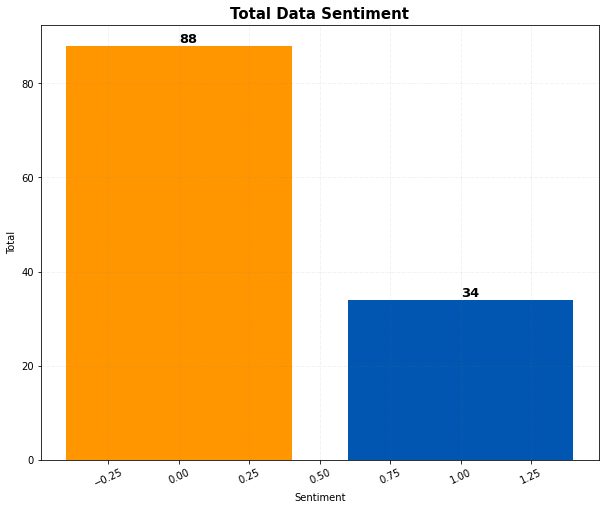

In [24]:
#Melakukan visualisasi data barchart
def vz_bar_chart(x, height):
    barplot = plt.bar(x, height, color=['#FF9600', '#0056B0'])
    for bar in barplot:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', fontweight='bold', fontsize = 13)
    plt.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.5,alpha = 0.2)
    plt.xticks(rotation = 25)

plt.figure(figsize = (10,8))

#Visualisasi data Sentiment
vz_bar_chart(ag['Sentiment'], ag['Total'])
plt.title("Total Data Sentiment", fontsize= 15, fontweight='bold')
plt.xlabel("Sentiment")
plt.ylabel("Total")


In [25]:
#Menganlisa data secara timeseries. 
#----------------------------------
import plotly.express as px

df = px.data.stocks()
fig = px.line(df_data,x='created at', y=df_data.columns[9], title="Data TimeSeries")
fig.show()


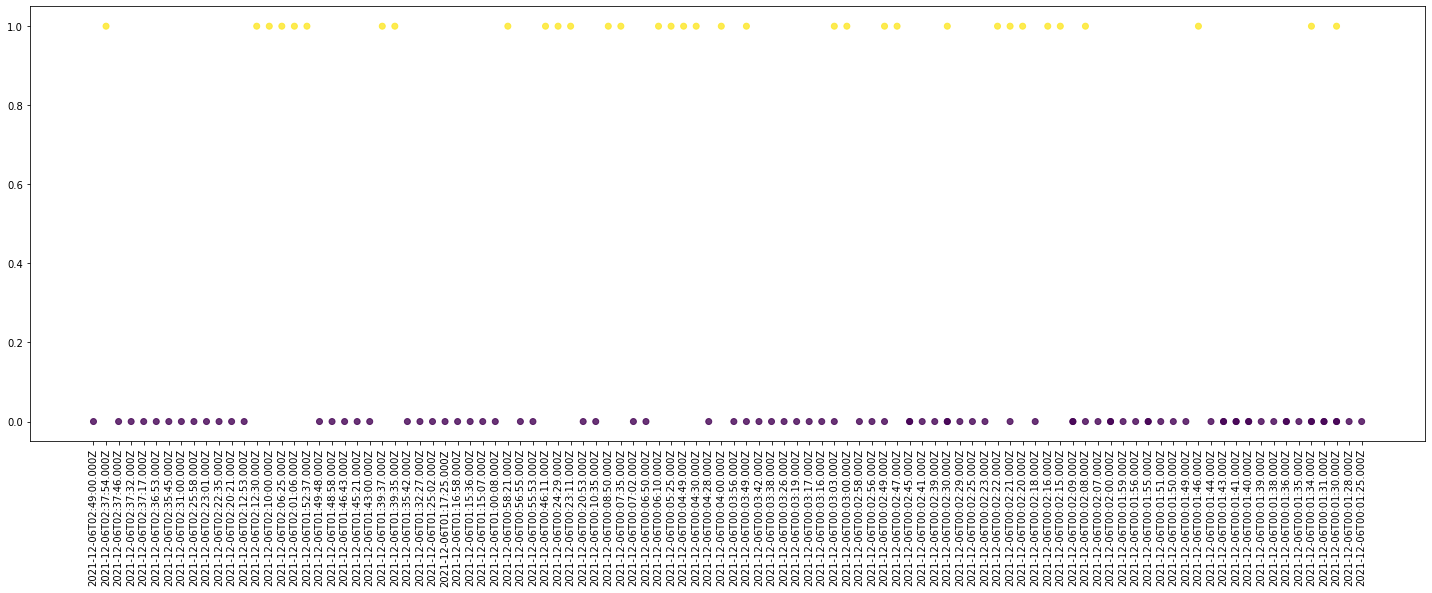

In [26]:
#Menganalisa data dari scatter plot yang didapatkan
#-------------------------------------

plt.figure(figsize=(25,8))

plt.scatter(df_data['created at'], df_data['Sentiment'], marker = 'o', c = df_data['Sentiment'], alpha = 0.8)
plt.xticks(rotation = 90)
plt.show()

In [27]:
train, test = train_test_split(df_data, test_size=0.2, random_state=1)
X_train = train['tweet_text'].values
X_test = test['tweet_text'].values
y_train = train['Sentiment']
y_test = test['Sentiment']

In [28]:
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [29]:
import numpy as np
np.random.seed(1)

pipeline_svm = make_pipeline(tf_idf, 
                            SVC(probability=True, kernel="linear", class_weight="balanced"))

grid_svm = GridSearchCV(pipeline_svm,
                    param_grid = {'svc__C': [0.01, 0.1, 1]}, 
                    cv = kfolds,
                    scoring='roc_auc',
                    verbose=1,   
                    n_jobs=-1) 
try:
    grid_svm.fit(X_train, y_train)
    grid_svm.score(X_test, y_test)
except ValueError:
    pass

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   12.2s finished


In [30]:
grid_svm.best_params_

{'svc__C': 1}

In [31]:
grid_svm.best_score_

0.7145714285714286

In [32]:
def report_results(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    pred = model.predict(X)        

    auc = roc_auc_score(y, pred_proba)
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    prec = precision_score(y, pred)
    rec = recall_score(y, pred)
    result = {'auc': auc, 'f1': f1, 'acc': acc, 'precision': prec, 'recall': rec}
    return result

In [33]:
result = report_results(grid_svm.best_estimator_, X_test, y_test)
result = pd.DataFrame(result, index = [0])
result

,auc,f1,acc,precision,recall
0,0.82,0.76,0.80,0.73,0.80


In [34]:
#Proses Penilaian akurasi sentimnet negatif dan positf.
#------------------------------------------------------
from sklearn.metrics import classification_report
predict = grid_svm.predict(X_test)

cm_report = classification_report(y_test, predict)
print(cm_report)


              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83        15
         1.0       0.73      0.80      0.76        10

    accuracy                           0.80        25
   macro avg       0.79      0.80      0.79        25
weighted avg       0.81      0.80      0.80        25



In [35]:
predict2 = grid_svm.predict(X_train)

cm_report2 = classification_report(y_train, predict2)
print(cm_report2)

              precision    recall  f1-score   support

         0.0       0.92      0.89      0.90        73
         1.0       0.69      0.75      0.72        24

    accuracy                           0.86        97
   macro avg       0.80      0.82      0.81        97
weighted avg       0.86      0.86      0.86        97



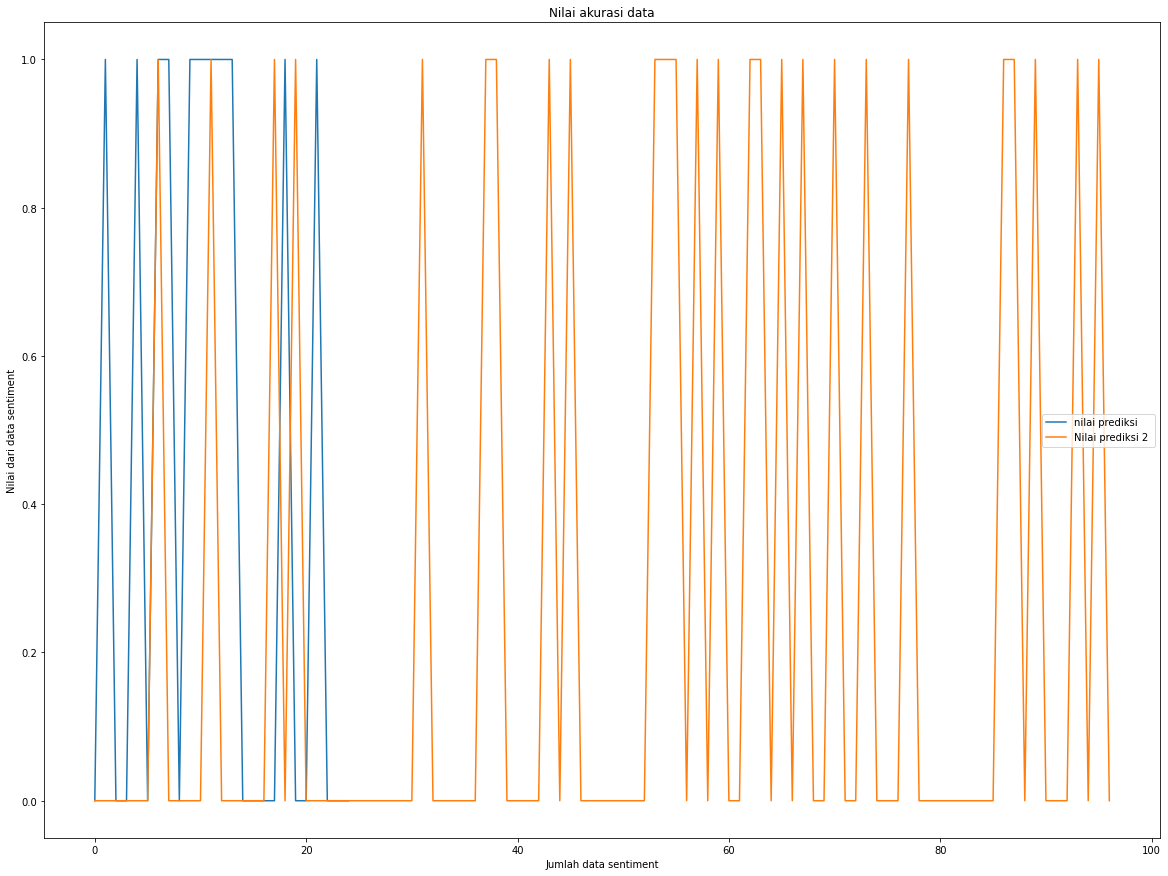

In [36]:
#Membuat model prediksi
plt.figure(figsize=(20, 15))
plt.title('Nilai akurasi data')
plt.plot(predict, label = 'nilai prediksi')
plt.plot(predict2, label = 'Nilai prediksi 2 ')
plt.legend()
plt.xlabel('Jumlah data sentiment')
plt.ylabel('Nilai dari data sentiment')
plt.show()

In [37]:
#Mengubah nilai dari preidt ke dalam bentuk dataframe
#----------------------------------------------------
predict = pd.DataFrame(predict)
predict2 = pd.DataFrame(predict2)

In [38]:
#Melihat perbandingan nilai dari pred dengan data actual
#-------------------------------------------------------
df_predict = pd.concat([predict, predict2])
df_predict = df_predict.rename({'0': 'sentiment_prediksi'}, axis = 1)
df_predict.reset_index(inplace=True, drop=True)

In [39]:
#menggabungkan nilai dari kedua data
df_sentiment = pd.concat([df_data, df_predict], axis = 1)
df_sentiment

,tweet_id,username,tweet_text,reference_type,created at,like,quote,reply,retweet,Sentiment,tweet_join,0
0,1467687491243184128.00,TedjaWoeloeng,"['nkri', 'bahaya', 'bapak', 'harap', 'kabinet'...",original,2021-12-06T02:49:00.000Z,1.00,0.00,0.00,0.00,0.00,nkri bahaya bapak harap kabinet harap perhati ...,0.00
1,1467684696930717952.00,Hantu_darat45,"['satu', 'indonesia']",original,2021-12-06T02:37:54.000Z,1.00,0.00,0.00,0.00,1.00,satu indonesia,1.00
2,1467684663372094976.00,adelleadriani,"['bakar', 'sekolah', 'sma', 'kelompok', 'separ...",original,2021-12-06T02:37:46.000Z,0.00,0.00,0.00,0.00,0.00,bakar sekolah sma kelompok separatis teroris k...,0.00
3,1467684605385842944.00,adelleadriani,"['bakar', 'sekolah', 'sma', 'kelompok', 'separ...",original,2021-12-06T02:37:32.000Z,0.00,0.00,0.00,0.00,0.00,bakar sekolah sma kelompok separatis teroris k...,0.00
4,1467684543024958976.00,adelleadriani,"['bakar', 'sekolah', 'sma', 'kelompok', 'separ...",original,2021-12-06T02:37:17.000Z,0.00,0.00,0.00,0.00,0.00,bakar sekolah sma kelompok separatis teroris k...,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...
117,1467645338601147904.00,ratiovary,"['teroris', 'kelompok', 'kriminal', 'senjata',...",original,2021-12-06T00:01:30.000Z,0.00,0.00,0.00,0.00,0.00,teroris kelompok kriminal senjata kkb yahukimo...,0.00
118,1467645337934257920.00,imtaehwan92,"['stop', 'provokasi', 'berita', 'bohong', 'duk...",original,2021-12-06T00:01:30.000Z,0.00,0.00,0.00,0.00,1.00,stop provokasi berita bohong dukung tnipolri t...,1.00
119,1467645336084644096.00,29fairus,"['papua', 'bangun', 'sma', 'negeri', 'oksibil'...",original,2021-12-06T00:01:30.000Z,0.00,0.00,0.00,0.00,0.00,papua bangun sma negeri oksibil distrik seramb...,0.00
120,1467645327943495936.00,6O596,"['teroris', 'kkb', 'bohong', 'lindung', 'bukti...",original,2021-12-06T00:01:28.000Z,0.00,0.00,0.00,0.00,0.00,teroris kkb bohong lindung bukti tebar teror b...,1.00


In [40]:
df_sentiment = df_sentiment[df_data.Sentiment == 1]
df_sentiment.head()

#https://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/

,tweet_id,username,tweet_text,reference_type,created at,like,quote,reply,retweet,Sentiment,tweet_join,0
1,1467684696930717952.00,Hantu_darat45,"['satu', 'indonesia']",original,2021-12-06T02:37:54.000Z,1.00,0.00,0.00,0.00,1.00,satu indonesia,1.00
13,1467678302684913920.00,yuyunsani,"['menang', 'perang', 'panglima', 'tni', 'andik...",original,2021-12-06T02:12:30.000Z,0.00,0.00,0.00,0.00,1.00,menang perang panglima tni andika perkasa diam...,1.00
14,1467677673795297024.00,Andespen1,"['top', 'berita', 'koran', 'rakyat', 'merdeka'...",original,2021-12-06T02:10:00.000Z,0.00,0.00,0.00,0.00,1.00,top berita koran rakyat merdeka prajurit tni w...,0.00
15,1467676774226031104.00,44_kopi,[],original,2021-12-06T02:06:25.000Z,0.00,0.00,0.00,0.00,1.00,,0.00
16,1467675436238787072.00,harian_sib,[],original,2021-12-06T02:01:06.000Z,0.00,0.00,0.00,0.00,1.00,,0.00


In [41]:
'''
# get the weight values for the linear equation from the trained SVM model
w = grid_svm.best_estimator_
w = w.coef_[0]

# get the y-offset for the linear equation
a = -w[0] / w[1]

# make the x-axis space for the data points
XX = np.linspace(0, 13)

# get the y-values to plot the decision boundary
yy = a * XX - grid_svm.intercept_[0] / w[1]

# plot the decision boundary
plt.plot(XX, yy, 'k-')

# show the plot visually
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.legend()
plt.show()
'''

"\n# get the weight values for the linear equation from the trained SVM model\nw = grid_svm.best_estimator_\nw = w.coef_[0]\n\n# get the y-offset for the linear equation\na = -w[0] / w[1]\n\n# make the x-axis space for the data points\nXX = np.linspace(0, 13)\n\n# get the y-values to plot the decision boundary\nyy = a * XX - grid_svm.intercept_[0] / w[1]\n\n# plot the decision boundary\nplt.plot(XX, yy, 'k-')\n\n# show the plot visually\nplt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)\nplt.legend()\nplt.show()\n"

In [42]:
'''
def get_roc_curve(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, pred_proba)
    return fpr, tpr
'''

'\ndef get_roc_curve(model, X, y):\n    pred_proba = model.predict_proba(X)[:, 1]\n    fpr, tpr, _ = roc_curve(y, pred_proba)\n    return fpr, tpr\n'

In [43]:
#roc_svm = get_roc_curve(grid_svm.best_estimator_, X_test, y_test)

In [44]:
'''
fpr, tpr = roc_svm
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.show()
'''

'\nfpr, tpr = roc_svm\nplt.figure(figsize=(14,8))\nplt.plot(fpr, tpr, color="red")\nplt.plot([0, 1], [0, 1], color=\'black\', lw=2, linestyle=\'--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'Roc curve\')\nplt.show()\n'

In [45]:
'''
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(grid_svm.best_estimator_, X_train, y_train, cv=5, n_jobs=-1, 
                   scoring="roc_auc", train_sizes=np.linspace(.1, 1.0, 10), random_state=1)
'''

'\nfrom sklearn.model_selection import learning_curve\n\ntrain_sizes, train_scores, test_scores =     learning_curve(grid_svm.best_estimator_, X_train, y_train, cv=5, n_jobs=-1, \n                   scoring="roc_auc", train_sizes=np.linspace(.1, 1.0, 10), random_state=1)\n'

In [46]:
'''
def plot_learning_curve(X, y, train_sizes, train_scores, test_scores, title='', ylim=None, figsize=(14,8)):

    plt.figure(figsize=figsize)
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt
'''

'\ndef plot_learning_curve(X, y, train_sizes, train_scores, test_scores, title=\'\', ylim=None, figsize=(14,8)):\n\n    plt.figure(figsize=figsize)\n    plt.title(title)\n    if ylim is not None:\n        plt.ylim(*ylim)\n    plt.xlabel("Training examples")\n    plt.ylabel("Score")\n\n    train_scores_mean = np.mean(train_scores, axis=1)\n    train_scores_std = np.std(train_scores, axis=1)\n    test_scores_mean = np.mean(test_scores, axis=1)\n    test_scores_std = np.std(test_scores, axis=1)\n    plt.grid()\n\n    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\n                     train_scores_mean + train_scores_std, alpha=0.1,\n                     color="r")\n    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\n                     test_scores_mean + test_scores_std, alpha=0.1, color="g")\n    plt.plot(train_sizes, train_scores_mean, \'o-\', color="r",\n             label="Training score")\n    plt.plot(train_sizes, test_scores_mean, \'o-\', c

In [47]:
'''
plot_learning_curve(X_train, y_train, train_sizes, 
                    train_scores, test_scores, ylim=(0.7, 1.01), figsize=(14,6))
plt.show()
'''


'\nplot_learning_curve(X_train, y_train, train_sizes, \n                    train_scores, test_scores, ylim=(0.7, 1.01), figsize=(14,6))\nplt.show()\n'